Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:
Ananya Gandhi, collaborated with Natalia Forero and Kayla Kim

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# HW 3:  Root Finding and Optimization

## Question 1 - Finding the Root

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  One way to do this is to solve for the zeros of the function $f(x) = x^2 - M$.

 - Note that not all the methods will work!
 - Make sure to handle the case where $M_0 = \sqrt{M}$.
 - We are only looking for the positive root of $f(x)$.

**(a)** [5] Write a function that uses fixed-point iteration to solve for the zeros of $f(x)$.  

Note: There are multiple ways to write the iteration function $g(x)$, some work better than others.  Make sure to use the input function $f(x)$ to formulate this.

In [2]:
from re import X
def fixed_point(x_0, f, tolerance):
    """Find the zeros of the given function f using fixed-point iteration
    
    :Input:
     - *x_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *x* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # YOUR CODE HERE
    # solve the equation f(x) = 0 
    # using x = g(x) where g(x) = f(x) + x

    x = x_0
    n = 0

    for steps in range(MAX_STEPS + 1):

      x = f(x_0) + x_0
      residual = numpy.abs(x - x_0)

      if residual <= tolerance:
        break

      n += 1
      x_0 = x
    # raise NotImplementedError()
    
    return x, n

In [3]:
M = 1.8
TOLERANCE = 1e-10
f = lambda x: x**2 - M

# Note that this test probably will fail
try:
    M_f, n = fixed_point(2.0, f, TOLERANCE)
except OverflowError:
    print("Fixed-point test failed!")
    print("Success!")
else:
    if n == -1:
        print("Fixed-point test failed!")
        print("Success!")
    else:
        print(M_f, n)
        raise ValueError("Test should have failed!")

Fixed-point test failed!
Success!


**(b)** [5] Write a function that uses Newton's method to find the roots of $f(x)$. The analytical derivative of $f'(x)$ is provided.

In [4]:
def newton(x_0, f, f_prime, tolerance):
    """Find the zeros of the given function f using Newton's method
    
    :Input:
     - *M_0* (float) - Initial iterate
     - *f* (function) - The function that will be analyzed
     - *f_prime* (function) - The derivative of *f*
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # YOUR CODE HERE
    x = x_0
    n = 0

    while (f(x) > tolerance) and (n < MAX_STEPS):
      
      delta = -1 * f(x)/f_prime(x)
      x += delta
      n += 1

    # raise NotImplementedError()
    
    return x, n

In [5]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M
f_prime = lambda x: 2.0 * x

M_f, n = newton(2.0, f, f_prime, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print(M_f, n)

M_f, n = newton(numpy.sqrt(M), f, f_prime, TOLERANCE)
print(M_f, n)
assert(n == 0)

print("Success!")

1.7320508075688772 4
1.7320508075688772 0
Success!


**(c)** [5] Write a function to find the zeros of $f(x)$ using the secant method.

In [6]:
def secant(x_0, f, tolerance):
    """Find the zeros of the given function f using the secant method
    
    :Input:
     - *M_0* (float) - Initial bracket
     - *f* (function) - The function that will be analyzed
     - *tolerance* (float) - Stopping tolerance for iteration
     
    :Output:
    If the iteration was successful the return values are:
     - *M* (float) - Zero found via the given intial iterate.
     - *n* (int) - Number of iterations it took to achieve the specified
       tolerance.
    otherwise
     - *M* (float) - Last iterate found
     - *n* (int) - *n = -1*
    """
    
    # Parameters
    MAX_STEPS = 1000
    
    # YOUR CODE HERE
    x0 = x_0[0]
    x1 = x_0[1]
    x = x1

    f0 = f(x0)
    f1 = f(x1)

    n = 0

    for k in range(1, MAX_STEPS + 1):

      x = x1 - (f1 * (x1 - x0))/(f1 - f0)

      if numpy.abs(f(x)) < tolerance:
        break
      
      x0 = x1
      x1 = x
      f0 = f(x0)
      f1 = f(x1)

      n += 1

    # raise NotImplementedError()
    
    return x, n

In [7]:
M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M

M_f, n = secant([0.0, 3.0], f, TOLERANCE)
numpy.testing.assert_almost_equal(M_f, numpy.sqrt(M))
print(M_f, n)

M_f, n = secant([1.0, numpy.sqrt(M)], f, TOLERANCE)
assert(n == 0)

print("Success!")

1.732050807565499 6
Success!


**(d)** [5] Using the theory and illustrative plots why the fixed-point method did not work (pick a bracket that demonstrates the problem well).  

YOUR ANSWER HERE

The fixed point iteration method does not work, because as we can see below, fixed point iteration does not converge and we can see the residuals between $g(x)$ and $x$ increasing in value. We no longer have a contraction mapping, so the fixed-point method does not work. 

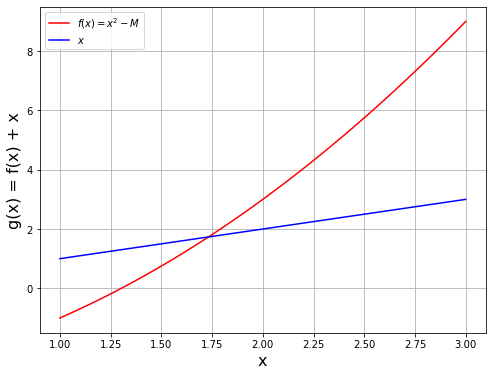

In [8]:
# Place plotting code here if needed

# YOUR CODE HERE

M = 3.0
TOLERANCE = 1e-10
f = lambda x: x**2 - M

x = numpy.linspace(1, 3, 100)

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x) + x, 'r',label='$f(x)=x^2 - M$')
axes.plot(x, x, 'b',label='$x$')
axes.set_xlabel("x",fontsize=16)
axes.set_ylabel("g(x) = f(x) + x",fontsize=16)
axes.legend(loc='best')

plt.grid()    
plt.show()

# raise NotImplementedError()

## Question 2 - Bessel Function Zeros

The zeros of the Bessel functions $J_0(x)$ can be important for a number of applications.  Considering only $x \geq 0$ 
we are going to find the first ten zeros of $J_0(x)$ by using a hybrid approach.

**(a)** [5] Plot the Bessel function $J_0(x)$ and its zeros on the same plot.  Note that the module `scipy.special` contains functions dealing with the Bessel functions (`jn`).

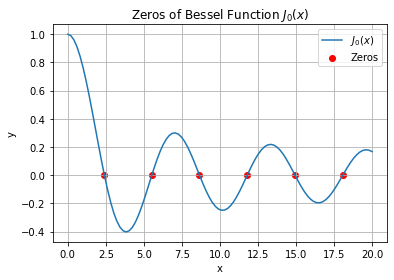

In [9]:
# YOUR CODE HERE

import scipy.special

x = numpy.linspace(0, 20, 100)
y = scipy.special.jn(0, x)
plt.plot(x, y, label="$J_0 (x)$")

# plot zeros
zeros = scipy.special.jn_zeros(0, 6)
plt.scatter(zeros, [0]*len(zeros), color="red", label="Zeros")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Zeros of Bessel Function $J_0 (x)$")
plt.grid()
plt.legend()
plt.show()
# raise NotImplementedError()

**(b)** [15] Now write a function `j0_zeros` that takes two tolerances, a bracket size tolerance `bracket_tolerance` and `tolerance` for the final convergence tolerance.  Given an initial bracket, the function should perform secant iterations until the bracket size is less than `bracket_tolerance`.  If this is successful then proceed with Newton's method using the newest value of the bracket until `tolerance` is reached.  Return both the zero found and the number of steps needed in each iteration.  Also write a `doc-string` for the function.

Notes:
 - Newton's method by itself does not work here given the initial brackets provided.
 - The secant method does work however it is slower than the approach outlined.
 - Try playing a bit yourself with the tolerances used.

In [10]:
import scipy.special

# Note that the num_steps being returned should be a list 
# of the number of steps being used in each method
def j0_zeros(x0, bracket_tolerance, tolerance):
    # YOUR CODE HERE
    # REMEMBER TO WRITE A DOC STRING FOR THIS FUNCTION
    
    """ This method uses secant iteration and Newton's Method to find a 
        root x of the Bessel Function J_0. 

        First uses secant iteration until bracket tolerance is achieved.
        Newton's Method is used after until tolerance is achieved.

        Parameters:
        -----------
        x0: array of size 2, including [x0, x1]
            initial bracket to find zero within
        
        bracket_tolerance: float, tolerance to use for secant iteration

        tolerance: float, tolerance to use for Newton's method

        Returns:
        --------
        x: float, final iterate

        num_steps: array of size 2, including [number of iterations in 
        secant method, number of iterations in Newton's method]
    """
    
    num_steps = []
    
    # first, perform secant iteration
    x_0 = x0[0]
    x_1 = x0[1]
    n = 0

    while True:

      bracket_size = x_1 - x_0

      if bracket_size <= bracket_tolerance:
        break

      f0 = scipy.special.jn(0, x_0)
      f1 = scipy.special.jn(0, x_1)

      x_2 = x_1 - (f1 * (x_1 - x_0))/(f1 - f0)
      x_0 = x_1
      x_1 = x_2
      n += 1

    num_steps.append(n)

    # next, perform Newton's Method
    x = x_1
    n = 0

    while True:

      fx = scipy.special.jn(0, x)

      if numpy.abs(fx) <= tolerance:
        break
      
      # derivative of J_0 (x) = -J_1 (x)
      fprime_x = -1 * scipy.special.jn(1, x)
      delta = -1 * fx / fprime_x
      x += delta
      n += 1

    num_steps.append(n)
    # raise NotImplementedError()
    
    return x, num_steps


In [11]:
brackets = [[ 2.0,  3.0], [ 4.0,  7.0], [ 7.0, 10.0], [10.0, 12.0], 
            [13.0, 15.0], [17.0, 19.0], [19.0, 22.0], 
            [22.0, 26.0], [26.0, 29.0], [29.0, 32.0]]

zero = []
for bracket in brackets:
    x, num_steps = j0_zeros(bracket, 1e-1, 1e-15)
    print(x, num_steps)
    zero.append(x)
numpy.testing.assert_allclose(zero, scipy.special.jn_zeros(0, 10), atol=0.0, rtol=1e-14)
print("Success!")

2.404825557695773 [1, 4]
5.520078110286311 [1, 4]
8.653727912911013 [1, 3]
11.791534439014281 [1, 3]
14.930917708487781 [1, 3]
18.071063967910924 [1, 2]
21.21163662987926 [1, 4]
24.352471530749302 [1, 4]
27.493479132040253 [1, 3]
30.634606468431976 [1, 3]
Success!


## Question 3 - Newton's Method Convergence

Recall that Newton's method converges as

$$|\epsilon_{n+1}| = \frac{|f''(c)|}{2 |f'(x_n)|} |\epsilon_n|^2$$

with $\epsilon_n = x_n - x^*$ where $x^*$ is the true solution and $c$ is between $x_n$ and $x^*$.

**(a)** [5] Show that the Newton iteration when $f(x) = x^2 - M$ with $M > 0$ is

$$x_{n+1} = \frac{1}{2} \left (x_n + \frac{M}{x_n} \right )$$

YOUR ANSWER HERE

Newton's Method uses the following equation to update $x$:

$$ x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

Where we have

$$ f(x) = x^2 - M $$
$$ f'(x) = 2x $$

So if we take $f(x_n)$ and $f'(x_n)$ and substitute into $x_{n + 1}$

$$ x_{n + 1} = x_n - \frac{x_n^2 - M}{2x_n} $$
$$ x_{n + 1} = x_n - \frac{x_n^2 - M}{2x_n} $$
$$ x_{n + 1} = x_n - (\frac{x_n^2}{2x_n} - \frac{M}{2x_n})$$
$$ x_{n + 1} = x_n - \frac{x_n}{2} + \frac{M}{2x_n}$$
$$ x_{n + 1} = \frac{1}{2}(x_n + \frac{M}{2x_n})$$

So we end up with the desired result:
$$ x_{n + 1} = \frac{1}{2}(x_n + \frac{M}{2x_n})$$

**(b)** [5] From this update scheme show that 

$$\frac{x_{n+1} - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

YOUR ANSWER HERE

Begin with the update equation from the last part:
$$ x_{n + 1} = \frac{1}{2}(x_n + \frac{M}{2x_n})$$
$$ x_{n + 1} = \frac{1}{2 x_n}(x_n^2 + M)$$

Use the equation:
$$(x_n - \sqrt{M})^2 = x_n^2 - 2x_n\sqrt{M} + M$$

Rewrite the equation as:
$$(x_n - \sqrt{M})^2 + 2x_n\sqrt{M} = x_n^2 + M$$

Substitute into the earlier update equation:
$$ x_{n + 1} = \frac{1}{2 x_n}((x_n - \sqrt{M})^2 + 2x_n\sqrt{M} )$$
$$ x_{n + 1} = \frac{1}{2 x_n}(x_n - \sqrt{M})^2 + \sqrt{M} $$
$$ x_{n + 1} - \sqrt{M}  = \frac{1}{2 x_n}(x_n - \sqrt{M})^2$$
$$ \frac{x_{n + 1}  - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

We have derived the desired result:
$$ \frac{x_{n + 1}  - \sqrt{M}}{(x_n - \sqrt{M})^2} = \frac{1}{2 x_n}$$

**(c)** [5] Confirm that the asymptotic error convergence matches the general convergence for Newton's method.

YOUR ANSWER HERE

We have $x^* = \sqrt{M}$ and can substitute $x^*$ into our final answer from part b:
$$ \frac{x_{n + 1}  - x^*}{(x_n - x^*)^2} = \frac{1}{2 x_n}$$

We also know that $e_n$ and $e_{n + 1}$ are be defined as:
$$ e_{n} = x_n - x^*$$
$$ e_{n+1} = x_{n+1} - x^*$$

We can apply these definitions to the first equation:
$$ \frac{e_{n + 1}}{(e_n)^2} = \frac{1}{2 x_n}$$

and rearrange the terms:
$$ |e_{n + 1}| = \frac{1}{2 x_n}{|e_n|^2}$$

Now, if we solve for $g''(x^*)$, we have:
$$g(x) = x - \frac{f(x)}{f'(x)}$$

$$g'(x) = \frac{f(x)f''(x)}{[f'(x)]^2}$$

$$g''(x) = \frac{[f'(x)]^3 f''(x) + f(x)[f'(x)]^2 f'''(x) - 2f(x)f'(x)[f''(x)]^2}{[f'(x)]^4}$$

Apply $f(x) = x^2 - M$, $f'(x) = 2x$, $f''(x) = 2$, and $f'''(x) = 0$:

$$g''(x) = \frac{(2x)^3 (2) - 2(x^2 - M)(2x)(2)^2}{(2x)^4}$$

$$g''(x) = \frac{16Mx}{16x^4}$$

$$g''(x) = \frac{M}{x^3}$$

Evaluate at $x = x^*$, knowing that $x^* = \sqrt{M}$

$$g''(x^*) = \frac{(x^*)^2}{(x^*)^3}$$
$$g''(x^*) = \frac{1}{x^*}$$

Going back to our other equation, we have:
$$ |e_{n + 1}| = \frac{1}{2 x_n}{|e_n|^2}$$

Apply $x_n = x^* + e_n$:
$$ |e_{n + 1}| = \frac{1}{2(x^* + e_n)}{|e_n|^2}$$

We know that
$$ \frac{1}{2(x^* + e_n)}{|e_n|^2} < \frac{1}{2x^*}{|e_n|^2}$$

So if we apply this above, we have:
$$ |e_{n + 1}| < \frac{1}{2x^*}{|e_n|^2}$$

Which we can rewrite, knowing $g''(x^*) = \frac{1}{x^*}$
$$ |e_{n + 1}| < \frac{g''(x^*)}{2!}{|e_n|^2}$$

This gives us the general convergence for Newton's Method, so our two answers align.

## Question 4 - Optimization of a Data Series

For the following questions we are given a set of data $(t_0, y_0), (t_1, y_1), \ldots, (t_N, y_N)$.

**(a)** [10] Write a function that takes in the data series $(t_i, y_i)$ and finds the value at a point $t_\ast$ by constructing the equation of the line between the two data points that bound $t_\ast$ and evaluating the resulting function at $t_\ast$.

Hints:
 - Make sure to handle the case that $t_\ast = t_i$.
 - If $t_\ast < t_0$ or $t_\ast > t_N$ then return the corresponding value $y_0$ or $y_N$.
 - If you write your function so that $t_\ast$ can be an array you can use the plotting code in the cell.  Otherwise just delete it.

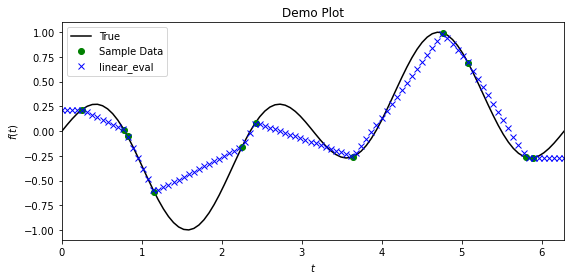

In [12]:
def linear_eval(t, y, t_star):
    # YOUR CODE HERE

    if isinstance(t_star, float):
      t_star = numpy.array([t_star])

    y_star = numpy.zeros(t_star.shape)
    t0 = t[0]
    tN = t[-1]

    for i in range(len(t_star)):
      if t_star[i] < t0:
        y_star[i] = y[0]
      
      elif t_star[i] > tN:
        y_star[i] = y[-1]
      
      else:

        for j in range(len(t)):

          if t[j] > t_star[i]:
            
            y_star[i] = ((y[j] - y[j - 1])/(t[j] - t[j-1]))*(t_star[i] - t[j]) + y[j]
            break
          
          elif t[j] == t_star[i]:
            y_star[i] = y[j]
            break



    # raise NotImplementedError()
            
    return y_star

N = 10
t_fine = numpy.linspace(0.0, 2.0 * numpy.pi, 100)
t_rand = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t_rand.sort()
f = lambda x: numpy.sin(x) * numpy.cos(2.0 * x)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth()*1.5)
axes = fig.add_subplot(1, 1, 1)
axes.plot(t_fine, f(t_fine), 'k-', label="True")
axes.plot(t_rand, f(t_rand), 'og', label="Sample Data")
axes.plot(t_fine, linear_eval(t_rand, f(t_rand), t_fine), 'xb', label="linear_eval")
axes.set_xlim((0, 2.0 * numpy.pi))
axes.set_title("Demo Plot")
axes.set_xlabel('$t$')
axes.set_ylabel('$f(t)$')
axes.legend()
plt.show()

In [13]:
# Note that these tests can fail sometimes as it is dependent on random data.
N = 100
f = lambda x: numpy.sin(x) * numpy.cos(x)
t = numpy.linspace(-1, 1, N + 1)
t_star = 0.5
answer = linear_eval(t, f(t), t_star)
if isinstance(answer, list):
    answer = answer[0]
print("Computed solution: %s" % answer)
print("True solution: %s" % f(t_star))
numpy.testing.assert_almost_equal(answer, f(t_star), verbose=True, decimal=7)
print("Success!")

Computed solution: [0.42073549]
True solution: 0.42073549240394825
Success!


**(b)** [10] Using the function you wrote in part (a) write a function that uses Golden search to find the maximum of a series of data.  Again you can use the plotting code available if your `linear_eval` function from part (a) handles arrays.  Note that the initial bracket you are given will determine what maximum you will find.

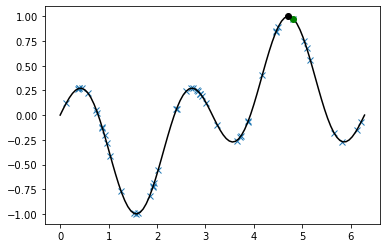

In [14]:
def golden_search(bracket, t, y, max_steps=100, tolerance=1e-4):

    phi = (numpy.sqrt(5.0) - 1.0) / 2.0
    
    # YOUR CODE HERE

    x = [bracket[0], None, None, bracket[1]]
    delta_x = x[3] - x[0]
    x[1] = x[3] - phi * delta_x
    x[2] = x[0] + phi * delta_x

    # check for initial bracket
    fx = linear_eval(t, y, numpy.array(x))
    bracket_min = min(fx[0], fx[-1])

    """if fx[1] > bracket_min and fx[2] > bracket_min:
      raise ValueError("interval has no minimum")
    
    elif delta_x < tol:
      raise ValueError("interval is already smaller than tolerance")"""

    xmid = (x[0] + x[3]) / 2
    x_array = [xmid]

    for k in range(1, max_steps + 1):
      f1 = linear_eval(t, y, x[1])
      f2 = linear_eval(t, y, x[2])

      if f1 > f2:

        xnew = [x[0], None, x[1], x[2]]
        delta_x = xnew[3] - xnew[0]
        xnew[1] = xnew[3] - phi * delta_x

      else:
        
        xnew = [x[1], x[2], None, x[3]]
        delta_x = xnew[3] - xnew[0]
        xnew[2] = xnew[0] + phi * delta_x
    
      x = xnew
      x_array.append((x[3] + x[0])/2)

      if numpy.abs(x[3] - x[0]) < tolerance:
        break

    t_star = x_array[-1]

    # raise NotImplementedError()
    return t_star

N = 50
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t.sort()
y = numpy.sin(t) * numpy.cos(2.0 * t)
t_star = golden_search([4.0, 5.0], t, y)
t_true = 3.0 *numpy.pi / 2.0

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, y, 'x', label="data")
t_fine = numpy.linspace(0.0, 2.0 * numpy.pi, 100)
axes.plot(t_fine, numpy.sin(t_fine) * numpy.cos(2.0 * t_fine), 'k', label="$f(x)$")
axes.plot(t_star, linear_eval(t, y, t_star), 'go')
axes.plot(t_true, numpy.sin(t_true) * numpy.cos(2.0 * t_true), 'ko', label="True")
#axes.set_xlim((3.0, 6.0))
#axes.set_ylim((-0.5, 1.1))
plt.show()

In [15]:
N = 100
t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
t.sort()
y = numpy.sin(t) * numpy.cos(2.0 * t)
t_star = golden_search([2.0, 3.0], t, y)
t_true = 7.0 * numpy.pi / 8.0
abs_error = numpy.abs(t_star - t_true)
rel_error = numpy.abs(t_star - t_true) / numpy.abs(t_true)
print("Error: %s, %s" % (abs_error, rel_error))
numpy.testing.assert_allclose(abs_error, 0.0, rtol=1e-1, atol=1e-1)
print("Success!")

Error: 0.045467658030944325, 0.016540348631855318
Success!


**(c)** [5] Below is sample code that plots the number of sample points $N$ vs. the relative error.  Note because we are sampling at random points that we do each $N$ 6 times and average the relative error to reduce noise.  Additionally a line is drawn representing what would be linear (1st order) convergence.

Modify this code and try it out on other problems.  Do you continue to see linear convergence?  What about if you change how we sample points?  Make sure that you change your initial interval and range of values of $t$ inside the loop.

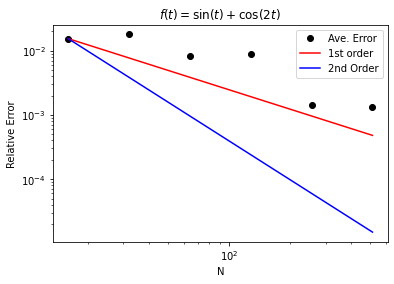

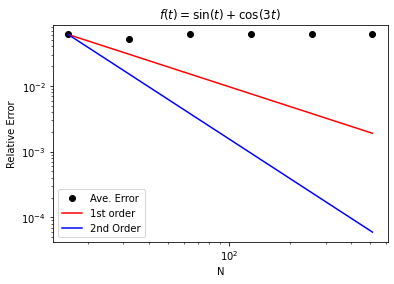

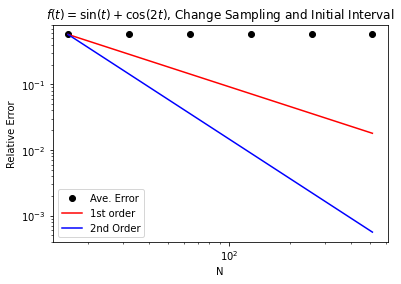

In [16]:
# YOUR CODE HERE
# raise NotImplementedError()
f = lambda t: numpy.sin(t) * numpy.cos(2.0 * t)
N_range = numpy.array([2**n for n in range(4, 10)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = 3.0 * numpy.pi / 2.0

for (i, N) in enumerate(N_range):
    for j in range(6):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
        t.sort()
        y = f(t)
        t_star = golden_search([4.0, 5.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= 6

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
plt.title("$f(t) = \sin(t) + \cos(2t)$")
axes.legend()
plt.show()

f = lambda t: numpy.sin(t) * numpy.cos(3.0 * t)
N_range = numpy.array([2**n for n in range(4, 10)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = 3.0 * numpy.pi / 2.0

for (i, N) in enumerate(N_range):
    for j in range(6):
        t = numpy.random.rand(N + 1) * (2.0 * numpy.pi)
        t.sort()
        y = f(t)
        t_star = golden_search([4.0, 5.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= 6

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
plt.title("$f(t) = \sin(t) + \cos(3t)$")
axes.legend()
plt.show()

f = lambda t: numpy.sin(t) * numpy.cos(2.0 * t)
N_range = numpy.array([2**n for n in range(4, 10)], dtype=int)
rel_error = numpy.zeros(len(N_range))
t_true = 3.0 * numpy.pi / 2.0

for (i, N) in enumerate(N_range):
    for j in range(6):
        t = numpy.random.rand(N + 3) * (2.0 / numpy.pi)
        t.sort()
        y = f(t)
        t_star = golden_search([1.0, 2.0], t, y)
        rel_error[i] += numpy.abs(t_star - t_true) / numpy.abs(t_true)
    rel_error[i] /= 6

order_C = lambda N, error, order: numpy.exp(numpy.log(error) - order * numpy.log(N))
    
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N_range, rel_error, 'ko', label="Ave. Error")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -1.0) * N_range**(-1.0), 'r', label="1st order")
axes.loglog(N_range, order_C(N_range[0], rel_error[0], -2.0) * N_range**(-2.0), 'b', label="2nd Order")
axes.set_xlabel("N")
axes.set_ylabel("Relative Error")
plt.title("$f(t) = \sin(t) + \cos(2t)$, Change Sampling and Initial Interval")
axes.legend()
plt.show()

YOUR ANSWER HERE

As we can see above, when the function $f(x)$ is changed from $f(x) = \sin (t) + \cos (2t)$ to $f(x) = \sin (t) + \cos (3t)$ (plot 2) then we no longer see convergence of the Average Error to the 1st order linear convergence. This shows that we no longer continue to see linear convergence after modifying our function. Also, if we keep the function the same but change the way we sample points (numpy.random.rand(N + 3) * (2.0 / numpy.pi)) and our interval ([1.0, 2.0]) (plot 3) then we also see that the Average Error does not converge to the 1st order linear convergence.

## Question 9 - Inverse Quadratic Interpolation

Let us see if we can extend the idea of the secant method to a higher order version.  The idea then is to take 3 values of the function such that $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ and fit an inverse quadratic function through these points (note that this requires that $f(x_i) \neq f(x_j) \forall i \neq j$).  The inverse function can be written as
$$
    g(y) = x_2 + \frac{(y - f(x_1)) (y - f(x_2))(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{(y - f(x_0)) (y - f(x_2))(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$
Inverse quadratic interpolation is one of the core components of many root solvers in libraries such as `numpy`.

Using this new function answer the following questions.

**(a)** [5] Find the x-intercept of the function $g(y)$.

YOUR ANSWER HERE

The y-intercept is: 

$$
    g(0) = x_2 + \frac{f(x_1)f(x_2)(x_0 - x_2)}{(f(x_0) - f(x_1))(f(x_0) - f(x_2))} + \frac{f(x_0)f(x_2)(x_1 - x_2)}{(f(x_1) - f(x_0))(f(x_1) - f(x_2))}
$$

**(b)** [5] Write down the resulting iteration so that it has the form
$$
    x_{n+1} = x_n + \phi(x_n, x_{n-1}, x_{n-2})
$$
where $\phi(x_n, x_{n-1}, x_{n-2})$ can also contain evaluations of the original function $f(x)$.

YOUR ANSWER HERE

Use the previous answer to determine the iteration:

$$
    x_{n + 1} = x_n + \frac{f(x_{n-1})f(x_n)(x_{n-2} - x_n)}{(f(x_{n-2}) - f(x_{n-1}))(f(x_{n-2}) - f(x_n))} + \frac{f(x_{n-2})f(x_n)(x_{n-1} - x_n)}{(f(x_{n-1}) - f(x_{n-2}))(f(x_{n-1}) - f(x_n))}
$$

Using the equation
$$
    x_{n + 1} = x_n + \phi(x_n, x_{n-1}, x_{n-2})
$$

We end up with
$$
    \phi(x_n, x_{n-1}, x_{n-2}) =  \frac{f(x_{n-1})f(x_n)(x_{n-2} - x_n)}{(f(x_{n-2}) - f(x_{n-1}))(f(x_{n-2}) - f(x_n))} + \frac{f(x_{n-2})f(x_n)(x_{n-1} - x_n)}{(f(x_{n-1}) - f(x_{n-2}))(f(x_{n-1}) - f(x_n))}
$$

**(c)** [10] Write a function that implements the inverse quadratic interpolation root finding method which takes in a function $f$ and an initial triplet for an initial guess $(x_0, x_1, x_2)$.  Make sure that it handles the case when the maximum number of steps is taken.

In [17]:
def inv_quad_root(f, x, tolerance=1e-4, max_steps=100):
    """Find a root of f(x) using inverse quadratic interpolation
    
    :Input:
     - *f* (func) Function to find the root of.
     - *x* (list) A triplet of values to be used to start the method.  Note
       that the triplet starts with the x_0 value and ends with the x_2 value
       in terms of the iteration scheme.
     - *tolerance* (float) Tolerance used as a stopping criteria with 
       |f(x_n)| < tolerance.
     - *max_steps* (int) Maximum number of steps allowed.  Raise an exception
       if max_steps are reached.
    :Output:
     - (float) Converged root.
    """
    # YOUR CODE HERE

    n = 0
    
    for i in range(1, max_steps + 1):

      x3 = x[2] + (f(x[1]) * f(x[2]) *(x[0] - x[2]))/((f(x[0]) - f(x[1])) * (f(x[0]) - f(x[2]))) + (f(x[0]) * f(x[2]) * (x[1] - x[2])) / ((f(x[1]) - f(x[0])) * (f(x[1]) - f(x[2])))
      
      if numpy.abs(f(x3)) < tolerance:
        break

      n += 1
      x[0] = x[1]
      x[1] = x[2]
      x[2] = x3


    if n == max_steps:
        raise ValueError("Max # of Steps Reached")

    # raise NotImplementedError()
    return x[2]

In [18]:
P = 1500.0
m = 12
n = 20.0
A = 1e6
f = lambda r, A=A, m=m, P=P, n=n: A - m * P / r * ((1.0 + r / m)**(m * n) - 1.0)
root = inv_quad_root(f, [0.06, 0.07, 0.08], tolerance=1e-6, max_steps=10)
print("Found root = %s" % root)
numpy.testing.assert_allclose(root, 0.08985602483470391, atol=1e-5)
print("Success!")

Found root = 0.08985602208848449
Success!
